In [27]:
import stats
import pandas as pd

In [2]:
dl = stats.get_data_active("TritonmanDraftLegal2025")

In [3]:
dl[dl.Gender == "Male"]

,Name,Gender,Age,Swim,T1,Bike,T2,Run,Total
0,Edoardo Giuseppe Leone,Male,23,00:05:34,00:00:22,00:30:27,00:00:22,00:15:16,00:52:02
1,Matheus Menezes,Male,23,00:05:33,00:00:25,00:30:31,00:00:25,00:15:07,00:52:03
2,Nathan Cohen,Male,27,00:05:38,00:00:18,00:30:23,00:00:19,00:15:56,00:52:36
3,Wiktor Rajca,Male,23,00:05:38,00:00:27,00:30:22,00:00:30,00:15:48,00:52:47
4,Nicholas Dorn,Male,25,00:05:37,00:00:27,00:30:22,00:00:26,00:16:02,00:52:56
...,...,...,...,...,...,...,...,...,...
85,Ryan Mongan,Male,59,00:07:23,00:00:28,00:37:04,00:00:36,00:20:54,01:06:29
86,Miguel Reyes,Male,21,00:06:38,00:00:46,00:38:54,00:00:55,00:20:10,01:07:25
87,Jairo Alejandro Angel Escobar,Male,34,00:07:09,00:00:40,00:38:28,00:00:35,00:20:36,01:07:31
90,Leo Tian,Male,19,00:06:51,00:00:54,00:38:33,00:00:38,00:20:45,01:07:43


In [7]:
dl[dl.Gender == "Female"].head()

,Name,Gender,Age,Swim,T1,Bike,T2,Run,Total
47,Bella Chirafisi,Female,23,00:06:23,00:00:37,00:34:28,00:00:38,00:17:38,00:59:45
48,Annie Meeder,Female,26,00:06:23,00:00:32,00:34:31,00:00:36,00:17:55,00:59:59
49,Erica Szczechowski,Female,27,00:06:23,00:00:35,00:34:30,00:00:54,00:17:42,01:00:06
54,Madeline Tapp,Female,23,00:06:24,00:00:33,00:34:32,00:00:36,00:19:31,01:01:37
56,Kasey Madsen,Female,24,00:06:30,00:00:40,00:35:42,00:00:52,00:18:16,01:02:02


In [9]:
dl.dtypes

Name      object
Gender    object
Age       object
Swim      object
T1        object
Bike      object
T2        object
Run       object
Total     object
dtype: object

In [29]:
dl.replace("--", None, inplace=True)
dl.sort_values(by=["Run"])

,Name,Gender,Age,Swim,T1,Bike,T2,Run,Total
1,Matheus Menezes,Male,23,00:05:33,00:00:25,00:30:31,00:00:25,00:15:07,00:52:03
0,Edoardo Giuseppe Leone,Male,23,00:05:34,00:00:22,00:30:27,00:00:22,00:15:16,00:52:02
3,Wiktor Rajca,Male,23,00:05:38,00:00:27,00:30:22,00:00:30,00:15:48,00:52:47
2,Nathan Cohen,Male,27,00:05:38,00:00:18,00:30:23,00:00:19,00:15:56,00:52:36
4,Nicholas Dorn,Male,25,00:05:37,00:00:27,00:30:22,00:00:26,00:16:02,00:52:56
...,...,...,...,...,...,...,...,...,...
110,Michaela Sumortin,Female,21,00:08:47,00:00:43,00:41:07,00:00:40,00:26:42,01:18:01
108,Aj Cuddeback,Female,26,00:08:46,00:00:38,00:39:42,00:00:34,00:27:10,01:16:52
111,Miisa Makela,Female,23,00:09:29,00:00:38,00:44:11,00:00:49,00:28:35,01:23:44
15,Rayan Jamshidian,Male,22,00:05:56,None,None,None,None,00:55:00


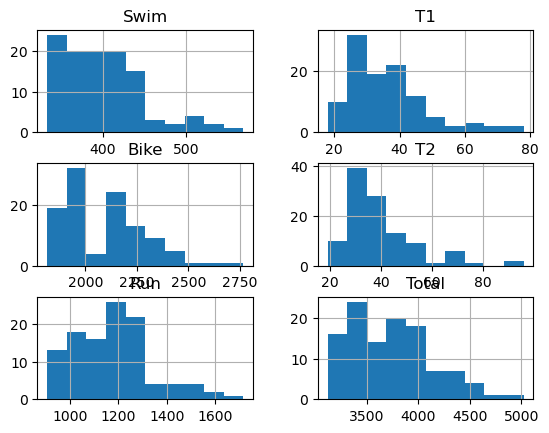

In [54]:

dl_timedelta = dl.astype({"Swim": "timedelta64[s]",
                          "T1": "timedelta64[s]",
                          "Bike": "timedelta64[s]",
                          "T2": "timedelta64[s]",
                          "Run": "timedelta64[s]",
                          "Total": "timedelta64[s]"})
dl_seconds = dl_timedelta.apply(lambda col: col.dt.total_seconds() if col.dtype == "timedelta64[s]" else col)
dl_seconds.hist();

In [5]:
classic = stats.get_data_active("TritonmanClassic2025")

In [6]:
classic

,Name,Gender,Age,Swim,T1,Bike,T2,Run,Total
0,Edoardo Giuseppe Leone,Male,23,00:10:52,00:00:38,00:30:04,00:00:35,00:15:59,00:58:10
1,Wiktor Rajca,Male,23,00:10:02,00:00:40,00:32:00,00:00:36,00:15:58,00:59:18
2,Angel Rodriguez,Male,26,00:10:35,00:00:50,00:31:07,00:00:48,00:16:13,00:59:36
3,Nicholas Dorn,Male,25,00:10:57,00:00:39,00:31:11,00:00:31,00:16:22,00:59:41
4,Oliver Pilon,Male,23,00:11:40,00:00:43,00:30:21,00:00:31,00:16:35,00:59:52
...,...,...,...,...,...,...,...,...,...
407,Scott Gant,Male,56,00:16:18,00:18:15,01:06:49,00:02:29,00:28:22,02:12:15
408,John Seifert,Male,61,00:33:33,00:08:15,00:58:45,00:06:01,00:27:20,02:13:55
409,Craig Peddie,Male,66,--,--,--,00:04:54,01:48:01,02:16:16
410,Kayleen Bjorklund,Female,30,00:22:07,00:06:29,01:12:29,00:04:24,00:34:58,02:20:28
